# Part II, Interacting with the archive "in different ways"

This is part 4 of the DANDI User Training on Nov 1, 2021.

In the previous parts you have already briefly interacted with the archive via [Web UI](https://gui.dandiarchive.org/), `dandi` command line interface (CLI), and even used `dandi` Python library to access sample files directly from Python.  

*Note*: Both CLI and Python library are provided by [dandi](https://pypi.org/project/dandi) package on PyPI (and Conda), with underlying codebase shared on GitHub as https://github.com/dandi/dandi-cli/.

In this part we will explore more of the functionality of `dandi` CLI/Python library, and introduce you to DANDI arhive API server, which allows you to interact with the archive directly from CLI or programming language of your choice (e.g., MATLAB).

## dandi-cli

### Command line interface


[DANDI Handbook](https://www.dandiarchive.org/handbook/10_using_dandi) provides a brief introduction to various functions of the `dandi` CLI, which we will practice with in this section.

As with any *sane* command line tool, `dandi` provides brief documentation on its usage if you add `--help` to its invocation:

In [2]:
!dandi --help

Usage: dandi [OPTIONS] COMMAND [ARGS]...

  A client to support interactions with DANDI archive
  (http://dandiarchive.org).

  To see help for a specific command, run

      dandi COMMAND --help

  e.g. dandi upload --help

Options:
  --version
  -l, --log-level [DEBUG|INFO|WARNING|ERROR|CRITICAL]
                                  Log level (case insensitive).  May be
                                  specified as an integer.  [default: INFO]
  --pdb                           Fall into pdb if errors out
  --help                          Show this message and exit.

Commands:
  delete            Delete dandisets and assets from the server.
  digest            Calculate file digests
  download          Download a file or entire folder from DANDI
  instances         List known Dandi Archive instances that the CLI can...
  ls                List .nwb files and dandisets metadata.
  organize          (Re)organize files according to the metadata.
  shell-completion  Emit shell script for en

which provides you with the overall syntax for using `dandi` CLI, and common options which could be specified right after `dandi` and before any particular `COMMAND`.  More information on a particular command could be obtained by adding `--help` *after* the `COMMAND`, e.g.:

In [3]:
!dandi ls --help

Usage: dandi ls [OPTIONS] [PATHS]...

  List .nwb files and dandisets metadata.

  Patterns for known setups:
   - DANDI:<dandiset id>
   - https://dandiarchive.org/...
   - https://identifiers.org/DANDI:<dandiset id>
   - https://<server>[/api]/[#/]dandiset/<dandiset id>[/<version>][/files[?location=<path>]]
   - https://*dandiarchive-org.netflify.app/...
   - https://<server>[/api]/dandisets/<dandiset id>[/versions[/<version>]]
   - https://<server>[/api]/assets/<asset id>[/download]
   - https://<server>[/api]/dandisets/<dandiset id>/versions/<version>/assets/<asset id>[/download]
   - https://<server>[/api]/dandisets/<dandiset id>/versions/<version>/assets/?path=<path>
   - dandi://<instance name>/<dandiset id>[@<version>][/<path>]
   - https://<server>/...

Options:
  -F, --fields TEXT               Comma-separated list of fields to display.
                                  An empty value to trigger a list of
                                  available fields to be printed out
  

which as you can see has a number of options which could become handy. Let's try `dandi ls` command right away on the dandiset you created in the previous section. 

1. In the Terminal (recommendation - make it wide) run

```
dandi ls -r data/100507  # <-- path to your dandiset here
```
which should present you with a tabular view of metadata for dandiset and the asset(s) you have in it.  

2. Such view could be quite "busy". To provide a more useful targetted listing of data at hand, use `-F` option to see only the fields you would like to see, e.g. add `-F age,session_id` to limit view only to those fields.

3. Try also `-f` to change the format of the output (e.g., from tabular to YAML).

*Note:* if you point `ls` to a single file, by default it would produce YAML output.

4. As `dandi ls --help` description suggested, it can also operate on remote dandisets available from DANDI archive. When pointed to a remote URL though, it outputs information about the assets as known to the archive, and places metadata into a `metadata` key.  In the Terminal try

```
dandi ls -r -f yaml --metadata all https://gui.dandiarchive.org/#/dandiset/000037
```

to get listing of metadata on dandiset itself and each individual asset.

*Note:* As you can see from the above invocation, `ls` (as well, as `download`) supports URLs which you can simply copy/paste from the browser while navigating https://gui.dandiarchive.org .

You could also point to a specific folder, e.g. while navigating it in the web UI:

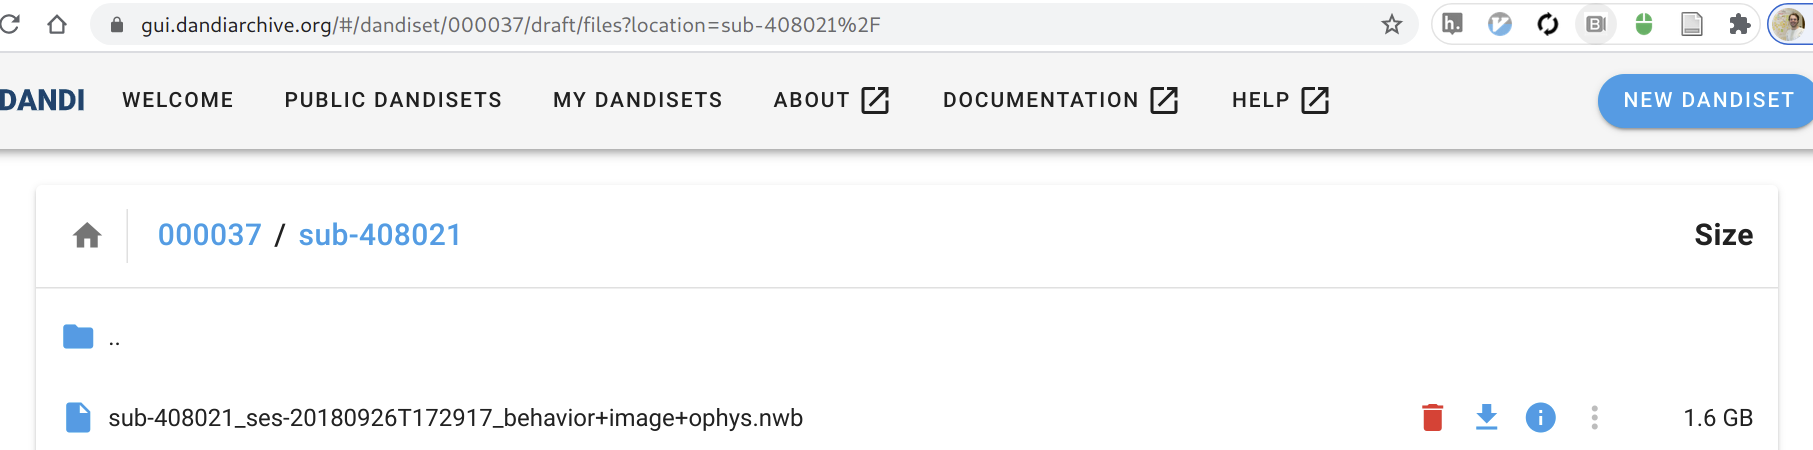

copy/paste that url to your `dandi ls` invocation. Or you can copy/paste a URL to individual file from web ui

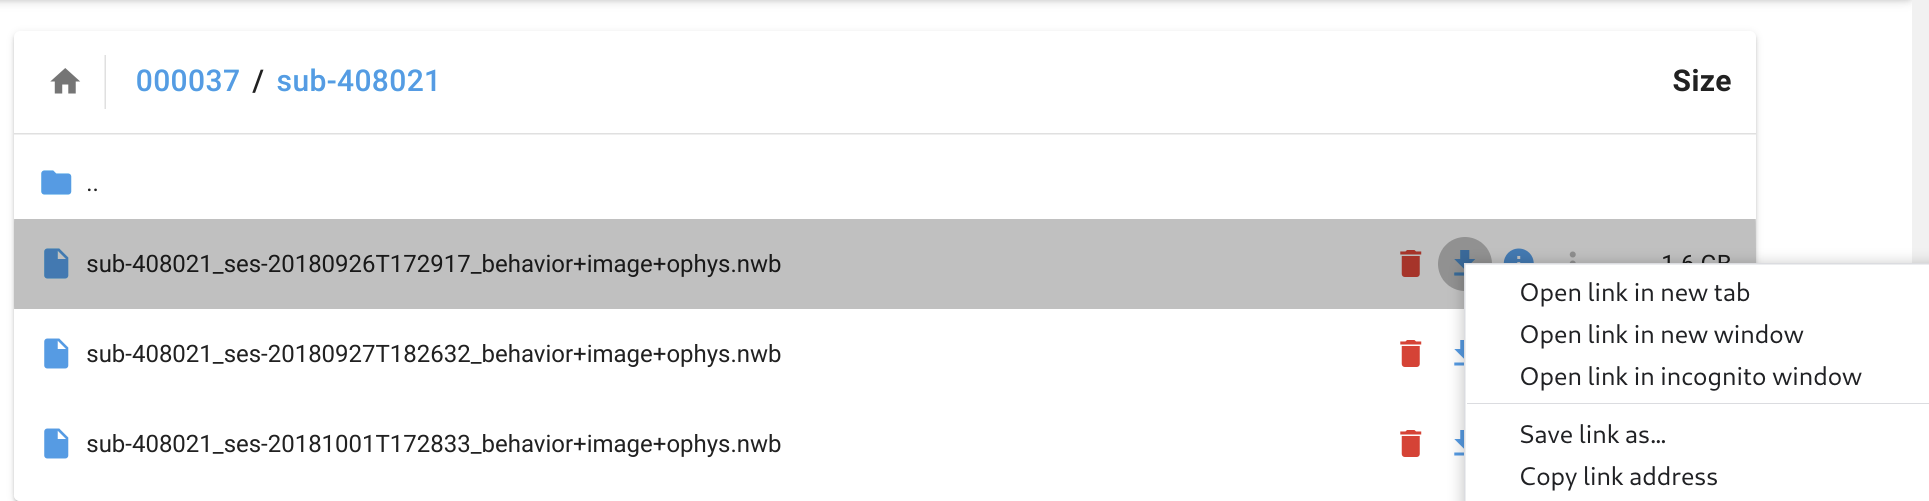

which would look like `https://api.dandiarchive.org/api/assets/834a2598-927c-4d56-91c6-92eeb9ef005c/download/` and paste it also into `dandi ls` invocation, e.g. do

```
dandi ls --metadata all https://api.dandiarchive.org/api/assets/834a2598-927c-4d56-91c6-92eeb9ef005c/download/
```

#### dandi download

`dandi download` is probably the most frequently used command by a "data consumer" user interested to download data. Let's see which options it provides: 

In [5]:
!dandi download --help

Usage: dandi download [OPTIONS] [URL]...

  Download a file or entire folder from DANDI

Options:
  -o, --output-dir DIRECTORY      Directory where to download to (directory
                                  must exist). Files will be downloaded with
                                  paths relative to that directory.
  -e, --existing [error|skip|overwrite|overwrite-different|refresh]
                                  What to do if a file found existing locally.
                                  'refresh': verify that according to the size
                                  and mtime, it is the same file, if not -
                                  download and overwrite.  [default: error]
  -f, --format [pyout|debug]      Choose the format/frontend for output. TODO:
                                  support all of the ls
  -J, --jobs INTEGER              Number of parallel download jobs.  [default:
                                  6]
  --download [dandiset.yaml,assets,all]
             

Please review the options. And although it does not say it yet, `download` command supports all those URL patterns which you saw listed by `dandi ls`.  It will even provide you with them if you enter some unrecognized URL, e.g.:

In [6]:
!dandi download from-the-ether

2021-10-29 13:03:02,835 [    INFO] Logs saved in /home/yoh/.cache/dandi-cli/log/20211029170301Z-4002393.log
Error: We do not know how to map URL from-the-ether to our servers.
Patterns for known setups:
 - DANDI:<dandiset id>
 - https://dandiarchive.org/...
 - https://identifiers.org/DANDI:<dandiset id>
 - https://<server>[/api]/[#/]dandiset/<dandiset id>[/<version>][/files[?location=<path>]]
 - https://*dandiarchive-org.netflify.app/...
 - https://<server>[/api]/dandisets/<dandiset id>[/versions[/<version>]]
 - https://<server>[/api]/assets/<asset id>[/download]
 - https://<server>[/api]/dandisets/<dandiset id>/versions/<version>/assets/<asset id>[/download]
 - https://<server>[/api]/dandisets/<dandiset id>/versions/<version>/assets/?path=<path>
 - dandi://<instance name>/<dandiset id>[@<version>][/<path>]
 - https://<server>/...


so you can download an entire dandiset, with all the assets if you provide a resource identifier (e.g., `DANDI:000027`) or a URL to that dandiset as you copy paste it from the browser (e.g. https://gui.dandiarchive.org/#/dandiset/000027/).  If URL points to the staging DANDI archive, `dandi download` will interact with that server.  

Keeping in mind listed above options and URL patterns listed above, do following excercises

1. Download entire [000027](https://gui.dandiarchive.org/#/dandiset/000027) dandiset (from the main archive).

*Note:* if dandiset was already published, without using a URL with version, `download` will download the most recent release, and not "draft" version

2.  Download a `draft` version of 000027 into some other folder.

3. ("optional"- bonus point) What is different between draft and published (0.210831.2033) version of the dandiset?

   *Hint:* `diff -Naur folder1/ folder2/` could be used in the Terminal to find an anwser.


4. Download `sub-anm369962/` folder from `000006` dandiset. 

#### dandi validate

is a command very useful for any "data producer".  As we have mentioned in the previous portion of the User Guide, all data uploaded to DANDI archive must follow established standards such as [NWB](https://www.nwb.org/nwb-neurophysiology/) and [BIDS](https://bids-specification.readthedocs.io/).  To ensure standard compliance `dandi upload` validates all files intended for upload and would skip (by default) any file which fails validation.

`dandi validate` should be used before the upload of data to ensure that `.nwb` files do not have any internal NWB inconsistencies, and contain metadata required by DANDI archive.  At the moment, the interface of the `validate` command is very trivial:

In [7]:
!dandi validate --help

Usage: dandi validate [OPTIONS] [PATHS]...

  Validate files for NWB (and DANDI) compliance.

  Exits with non-0 exit code if any file is not compliant.

Options:
  --help  Show this message and exit.


In [9]:
!dandi validate data/mydata/  # <-- put path to the .nwb files you want to validate here

2021-10-29 13:20:32,275 [    INFO] data/mydata/ecephys_example.nwb: ok
Summary: No validation errors among 1 file(s)
2021-10-29 13:20:32,275 [    INFO] Logs saved in /home/yoh/.cache/dandi-cli/log/20211029172030Z-4004654.log
